#Market Segmentation - Cluster Analysis

## Install packages

In [ ]:
# import Python packages
import pandas as pd
import numpy as np
np.random.seed(9650)
from google.colab import files
import matplotlib.pyplot as plt
from sklearn import metrics

# Functions used to preprocess the data
from sklearn import preprocessing

# Functions used for Hierarchical Clustering
from scipy.cluster import hierarchy

# Functions used for K-Means
from sklearn import cluster

# Functions used for chi-squared test
from scipy.stats import chi2_contingency

## Data

1. Demographic Data
2. Demographic Code
3. PERCEPTUAL DATA
4. Psychographic Data

In [ ]:
# import the data
uploaded = files.upload()
FordDemo = pd.read_excel('Ford Ka Data.xlsx', sheet_name=0, skiprows=6)
FordDemo.head(5)

Saving Ford Ka Data.xlsx to Ford Ka Data.xlsx


,Respondent Number,Preference Group,Gender,Age,Marital Status,Number of Children,1st Time Purchase,Age Category,Children Category,Income Category
0,1,1,2,44,3,0,2,5,0,6
1,2,3,1,24,2,1,1,1,1,3
2,3,2,2,34,3,1,2,3,1,1
3,4,3,1,44,3,0,2,5,0,3
4,5,1,2,41,1,2,1,5,2,4


In [ ]:
# # # reset the index
# # FordDemo = FordKa.set_index(FordKa.columns[0])
# # reset the column name
# FordKa.columns = FordKa.iloc[6]
# #
# FordDemo = FordKa[7:].reset_index(drop=True)


In [ ]:
FordDemo.columns

Index(['Respondent Number', 'Preference Group', 'Gender', 'Age',
       'Marital Status', 'Number of Children', '1st Time Purchase',
       'Age Category', 'Children Category', 'Income Category'],
      dtype='object')

In [ ]:
# standardize the data because distance-based methods (e.g., hierarchical clustering, k-means)
# sensitive to large differences in magnitudes between columns
df = FordDemo[['Gender', 'Marital Status', '1st Time Purchase',
       'Age Category', 'Children Category', 'Income Category']]
df_sc = pd.DataFrame(preprocessing.scale(df),columns=df.columns)
df_sc.head(5)

,Gender,Marital Status,1st Time Purchase,Age Category,Children Category,Income Category
0,1.040833,1.208221,0.416784,0.762563,-0.764265,1.479900
1,-0.960769,0.137103,-2.399324,-1.713291,0.460519,-0.433764
2,1.040833,1.208221,0.416784,-0.475364,0.460519,-1.709540
3,-0.960769,1.208221,0.416784,0.762563,-0.764265,-0.433764
4,1.040833,-0.934015,-2.399324,0.762563,1.685303,0.204124


In [ ]:
# what does scaling do?
print(df_sc.mean())
print(df_sc.var())

Gender               1.421085e-17
Marital Status      -1.385558e-16
1st Time Purchase   -2.380318e-16
Age Category         1.136868e-16
Children Category   -2.842171e-17
Income Category     -9.947598e-17
dtype: float64
Gender               1.004016
Marital Status       1.004016
1st Time Purchase    1.004016
Age Category         1.004016
Children Category    1.004016
Income Category      1.004016
dtype: float64


## Hierarchical Clustering

Hierarchical Clustering Analysis is one of the most popular techniques used for market segmentation. It is a numerical procedure that attempts to separate a set of observations into clusters from the bottom-up by joining single individuals sequentially until we obtain one large cluster. Hence, this technique doesn’t require the pre-specification of the number of clusters, which can be assessed through the “dendrogram” (a tree-like representation of the data).

More specifically, the algorithm works as follow:

1.   Each respondent is initially assigned to his or her own cluster
2.   Identify the distance between each cluster (intially between pairs of respondents)
3.   The two closest clusters are combined into one
4.   Repeat steps 2 and 3 until there is one unique cluster containing all the observations
5.   Represent the clusters in a dendrogram

A key aspect of hierarchical clustering is choosing how to compute the distance between two clusters. Is it equal to the maximal distance between two points from each of these clusters? Or the minimal distance? What about the distance between two points? In this handout, we will use Ward’s criterion which aims to minimize the total variance within-cluster.

In this notebook, we use scipy but scikit-learn may also be used.

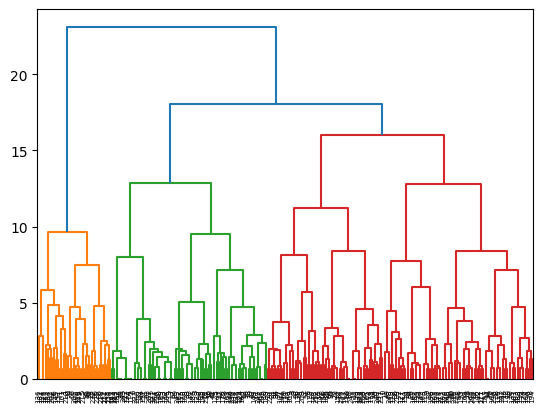

In [ ]:
linkages = hierarchy.linkage(df_sc,method='ward')
hierarchy.dendrogram(linkages)
plt.show()
# height represents dissimilarity between elements that are joined

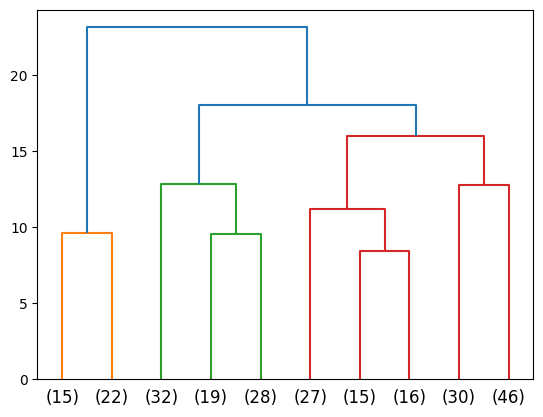

In [ ]:
hierarchy.dendrogram(linkages,orientation='top',
                     truncate_mode='lastp',p=10)
# p branches shown
plt.show()

How many clusters do you think there are?
How many observations are in each cluster?



In [ ]:
labels_hc = hierarchy.fcluster(linkages,t=3,criterion='maxclust')
# labels = label for each observation
print(labels_hc[:5])
# print number of observations in each cluster
print(list(zip(*np.unique(labels_hc,return_counts=True))))
# the horizontal ordering of the clusters/observations is not meaningful

# number of people in each cluster

[3 1 3 2 1]
[(1, 37), (2, 79), (3, 134)]


How can we characterize each cluster?

In [ ]:
type(df_sc)

pandas.core.frame.DataFrame

In [ ]:
# function to show cluster size and calculate cluster average values
def check_clusters(data,labels):
  print(list(zip(*np.unique(labels,return_counts=True))))
  # pivot_table() calculates the mean by default
  return pd.pivot_table(data,index=labels)

check_clusters(df_sc,labels_hc)

[(1, 106), (2, 69), (3, 75)]


6,Age Category,Children Category,Gender,Income Category
1,0.015135,-0.486956,-0.960769,-0.036588
2,-0.089633,-0.693263,1.040833,-0.184155
3,0.061071,1.326033,0.400320,0.221134


You can also use a distance based criterion.

In [ ]:
labels_hc = hierarchy.fcluster(linkages,t=15,criterion='distance')
# t captures the threshold for cutting the dendrogram
# labels = label for each observation
print(labels_hc[:5])
# print number of observations in each cluster
print(list(zip(*np.unique(labels_hc,return_counts=True))))

[2 1 3 1 3]
[(1, 106), (2, 69), (3, 75)]


How can we characterize each cluster?

In [ ]:
check_clusters(df_sc,labels_hc)

[(1, 106), (2, 69), (3, 75)]


6,Age Category,Children Category,Gender,Income Category
1,0.015135,-0.486956,-0.960769,-0.036588
2,-0.089633,-0.693263,1.040833,-0.184155
3,0.061071,1.326033,0.400320,0.221134


##Crosstab

We want to understand the relationship between the ford purchasing behavior of people in different income categories and which cluster they belong to. Let's look at the frequency table.

In [ ]:
tab = pd.crosstab(columns=FordDemo['Preference Group'],index=FordDemo['Gender'],margins=True,colnames=[' Preference Group'],rownames=['Gender'])
tab

Preference Group,1,2,3,All
Gender,,,,
1,54,36,40,130
2,62,36,22,120
All,116,72,62,250



We want to understand the relationship between the ford purchasing behavior of people who have different number of children and which cluster they belong to. Let's look at the frequency table.

In [ ]:
tab = pd.crosstab(columns=labels_hc,index=FordDemo['Number of Children'],margins=True,colnames=['Cluster'],rownames=['Children Category'])
tab

Cluster,1,2,3,All
Children Category,,,,
0,83,65,0,148
1,22,4,22,48
2,1,0,30,31
3,0,0,20,20
4,0,0,3,3
All,106,69,75,250


## Chi-squared Test

We want to test if the relationship above is statistically significant. Is there a statistically significant difference between the expected frequencies and the observed frequencies?

Null hypothesis: There is no relationship between what type of coffee someone prefers and cluster assignment.

If the p-value is greater than 0.05, we fail to reject the null hypothesis.

In [ ]:
chi2, p, dof, expected = chi2_contingency(tab.values[:3,:3])
chi2, p, dof

(5.38614842702718, 0.24991985759838645, 4)

Is there a significant relationship?

## K-means Clustering

We now focus on a different method called K-Means. This method, which requires us to specify in advance the number of clusters, aims to group the observations based on their similarity using an optimization procedure. The aim is to minimize the within-cluster variation, which is defined as the sum of the squared Euclidean distance between each data point to the centroid of its cluster. More precisely, the algorithm works as follow:



1.   Start by assigning each point to a cluster randomly
2.   Compute the centroid of each cluster and the distances of each point to each centroid
3.   Reassign each observation to the closest centroid
4.   Repeat Steps 2 and 3 until the within-cluster variance is minimized

In [ ]:
centroids_km, labels_km, inertia_km = cluster.k_means(df_sc,n_clusters=3,random_state=9651)
# set seed for random state so results are reproducible

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
check_clusters(df_sc,labels_km)

[(0, 55), (1, 105), (2, 90)]


6,Age Category,Children Category,Gender,Income Category
0,0.166107,1.663034,0.131014,0.192526
1,0.031597,-0.507644,-0.960769,-0.032806
2,-0.138373,-0.424047,1.040833,-0.079382


How do the k-means results compare to hierarchical clustering?

In [ ]:
tab = pd.crosstab(columns=labels_hc,index=FordDemo['Preference Group'],margins=True,colnames=['Cluster'],rownames=['Preference Group'])
tab

Cluster,1,2,3,All
Preference Group,,,,
1,43,33,40,116
2,31,21,20,72
3,32,15,15,62
All,106,69,75,250


In [ ]:
chi2, p, dof, expected = chi2_contingency(tab.values[:3,:4])
chi2, p, dof

(3.9732022260662463, 0.6803030460684789, 6)

In [ ]:
inertia_km

603.2137609977287

### Assessing Number of Clusters

Several methods have been discussed to help determine the number of clusters one should opt for. In this notebook, we present two related approaches:

*   Inertia Plot: inertia is equal to the within cluster sum of squares. By minimizing inertia, we ensure that entities within each cluster are similar to each other.
*   Ratio Score Plot: this plot represents the ratio of the total sum of squares (i.e., inertia when there is only one cluster) minus the within cluster sum of squares (the difference is called the between cluster sum of squares) and the total sum of squares.

Note that in the function KElbowVisualizer below, inertia is called distortion. However, in some instances, statisticians use different definitions and formulas for inertia and distortion. You must carefully review the ReadMe and sometimes the code used in a package to avoid bad surprises.




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

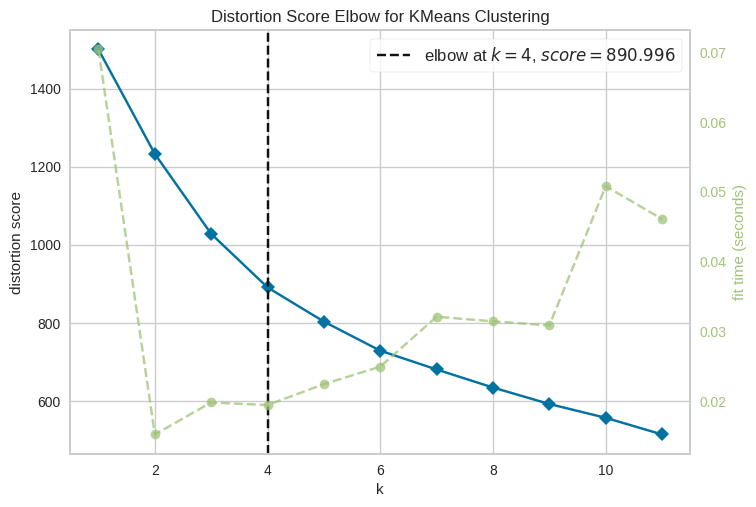

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from sklearn.cluster import KMeans
# k_means() is a wrapper that returns the result of KMeans.fit()
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(df_sc)
visualizer.show()

In order to prepare the ratio plot, we must determine the total sum of squares which is the inertia when we only use one cluster.

In [ ]:
ratio = []
_, _, total_sum_squares = cluster.k_means(df_sc,n_clusters=1)

for i in range(11):
  _, _, inertia_i = cluster.k_means(df_sc,n_clusters=i+1)
  ratio.append(1-(inertia_i/total_sum_squares))
  print(inertia_i)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

1000.0000000000003
747.4016848952333
617.0092001913231
497.13654396829327
426.9864049100595
375.3526174235467
322.70511933007776
274.5167458180469
247.93321994422826


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


225.14723283508397
203.44980741252607


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
ratio = pd.DataFrame(ratio)
ratio = ratio.reset_index()
ratio['index'] = ratio['index'] + 1
ratio.columns = ['Number of Clusters','Ratio']
ratio

,Number of Clusters,Ratio
0,1,0.000000
1,2,0.252598
2,3,0.382991
3,4,0.502863
4,5,0.573014
5,6,0.624647
6,7,0.677295
7,8,0.725483
8,9,0.752067
9,10,0.774853


In [ ]:
# what's going on underneath?
# recall that inertia = total within sum of squares
np.sum((metrics.pairwise.euclidean_distances(centroids_km,np.array(df_sc.mean()).reshape(-1,1).transpose())**2).transpose()*[152,82,48])/total_sum_squares

0.5916674655901876

Text(0.5, 1.0, 'Ratio Plot')

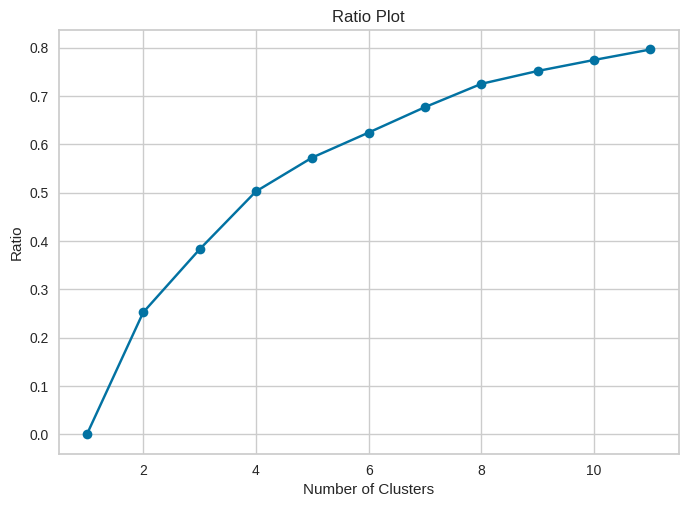

In [ ]:
plt.plot(ratio['Number of Clusters'],ratio['Ratio'],marker="o")
plt.xlabel('Number of Clusters')
plt.ylabel('Ratio')
plt.title('Ratio Plot')

In [ ]:
# select the columns that have the answers to the survey questions and store the data in df
psy_data = pd.read_excel('Ford Ka Data.xlsx', sheet_name=3, header=None)

psy_data.head(10)

,0,1,2,3,4,5,6,7,8,9,...,53,54,55,56,57,58,59,60,61,62
0,Psychographic Data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,This sheet contains the respondents' responses...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7-point scale was used for all the questions w...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,n=250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Respondent Number,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,Q53,Q54,Q55,Q56,Q57,Q58,Q59,Q60,Q61,Q62
7,1,6,2,4,3,1,5,5,3,4,...,2,4,5,4,5,3,4,4,4,2
8,2,7,7,7,5,4,4,5,4,5,...,1,1,1,1,5,4,3,5,4,5
9,3,5,4,6,5,7,5,3,5,4,...,3,5,6,3,4,4,5,3,4,4


In [ ]:
# reset the column
psy_data.columns = psy_data.iloc[6]
#
psy_data = psy_data[7:].reset_index(drop=True)

In [ ]:
psy_data.set_index("Respondent Number", inplace=True)

psy_data.head(4)
